In [13]:
import os
os.chdir(r"c:\Users\britt\Desktop\YH\Applicerad AI\job_discrimination_sandbox")
import warnings

import matplotlib.pyplot as plt
import numpy as np
import optuna
import pandas as pd
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
with open("data/cleaned_data/cross_val_split.pkl", "rb") as read_file:
    folds = pickle.load(read_file)

In [3]:
def objective(trial):
    C = trial.suggest_float("C", 1e-7, 10.0, log=True)
    c_weight = trial.suggest_categorical("c_weight", ["balanced", None])

    clf = LogisticRegression(C=C, class_weight=c_weight)
    scores = []
    for fold in folds[:-1]:
        clf.fit(fold["Train X scaled embeddings"], fold["Train y classes"])
        scores.append(clf.score(fold["Test X scaled embeddings"], fold["Test y classes"]))

    return np.mean(scores)

In [4]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=500)

[I 2023-01-24 10:40:29,098] A new study created in memory with name: no-name-c6982bfb-930d-4de0-b4d7-5cd99fe4018f
[I 2023-01-24 10:40:29,141] Trial 0 finished with value: 0.593681917211329 and parameters: {'C': 0.012457626508944634, 'c_weight': None}. Best is trial 0 with value: 0.593681917211329.
[I 2023-01-24 10:40:29,168] Trial 1 finished with value: 0.6372549019607843 and parameters: {'C': 7.20408921085675e-05, 'c_weight': 'balanced'}. Best is trial 1 with value: 0.6372549019607843.
[I 2023-01-24 10:40:29,225] Trial 2 finished with value: 0.593681917211329 and parameters: {'C': 0.0005534903868816398, 'c_weight': None}. Best is trial 1 with value: 0.6372549019607843.
[I 2023-01-24 10:40:29,290] Trial 3 finished with value: 0.593681917211329 and parameters: {'C': 2.2861647719472282e-05, 'c_weight': None}. Best is trial 1 with value: 0.6372549019607843.
[I 2023-01-24 10:40:29,419] Trial 4 finished with value: 0.8554829339143065 and parameters: {'C': 3.4537802579689636, 'c_weight': Non

In [5]:
study.best_params

{'C': 6.9776328419880755, 'c_weight': None}

In [6]:
clf = LogisticRegression(C=6.98)
scores = []
for fold in folds[:-1]:
    clf.fit(fold["Train X scaled embeddings"], fold["Train y classes"])
    scores.append(clf.score(fold["Test X scaled embeddings"], fold["Test y classes"]))

np.mean(scores)

0.8681917211328976

In [7]:
test_set = folds[-1]
clf.fit(test_set["Train X scaled embeddings"], test_set["Train y classes"])
clf.score(test_set["Test X scaled embeddings"], test_set["Test y classes"])

0.8823529411764706

In [9]:
pred = clf.predict(test_set["Test X scaled embeddings"])

acc = accuracy_score(pred, test_set["Test y classes"])
recall = recall_score(pred, test_set["Test y classes"], average="weighted")
precision = precision_score(pred, test_set["Test y classes"], average="weighted")
f1 = f1_score(pred, test_set["Test y classes"], average="weighted")

c:\Users\britt\Desktop\YH\Applicerad AI\job_discrimination_sandbox\venv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
print("Classification with logistic regression and scaled embeddings model:")
print(f"Score: {round(acc, 3)}")
print(f"F1: {round(f1, 3)}")
print(f"Recall: {round(recall, 3)}")
print(f"Precision: {round(precision, 3)}")

Classification with logistic regression and scaled embeddings model:
Score: 0.882
F1: 0.91
Recall: 0.882
Precision: 0.941


In [11]:
cm = confusion_matrix(y_true=test_set["Test y classes"], y_pred=pred, labels=clf.classes_)

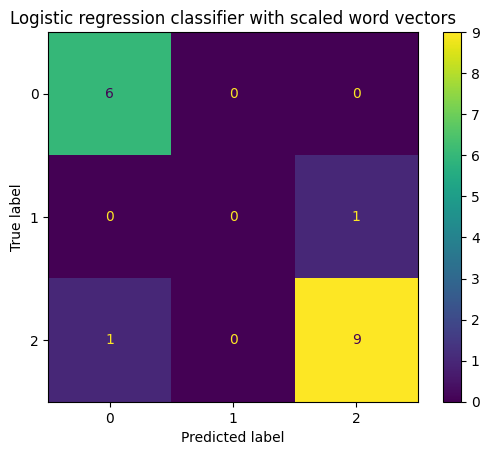

In [16]:
plot = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
plot.plot()
plt.title("Logistic regression classifier with scaled word vectors")
plt.show()